In [3]:
import networkx as nx

In [44]:
G = nx.Graph ()

In [45]:
G.add_nodes_from ( [('A', {'pos' : [3, 3]}),
                    ('B', {'pos' : [2, -5]}),
                   ('C', {'pos' : [5, 2]}),
                   ('D',{'pos' : [-1 ,2]}),
                   ('E', {'pos' : [4,-5]})] )

In [46]:
G.add_edges_from ([('D', 'A', {'weight' : 1.3}),('A', 'C', {'weight' : 3.9}),('D', 'E', {'weight' : 0.8}),('B', 'C',{'weight' : 0.6}),('A', 'E', {'weight' : 2.2}),('D', 'B', {'weight' : 3.4})])

In [47]:
import matplotlib.pyplot as plt

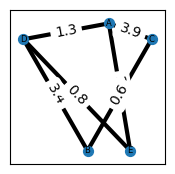

In [51]:
plt.figure(figsize= (2,2))
positions = nx.get_node_attributes(G, 'pos')
#nx.draw_network_edge_Labels(G) 
nx.draw_networkx(G,pos=positions, node_size=50, font_size=6, width=3)
weights = nx.get_edge_attributes (G , 'weight')
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=weights);

In [55]:
nx.to_pandas_edgelist(G);

In [59]:
list (G.adjacency());

In [60]:
nx.to_pandas_adjacency(G)

,A,B,C,D,E
A,0.0,0.0,3.9,1.3,2.2
B,0.0,0.0,0.6,3.4,0.0
C,3.9,0.6,0.0,0.0,0.0
D,1.3,3.4,0.0,0.0,0.8
E,2.2,0.0,0.0,0.8,0.0


In [62]:
adjacency = nx.to_pandas_adjacency(G)
adjacency

,A,B,C,D,E
A,0.0,0.0,3.9,1.3,2.2
B,0.0,0.0,0.6,3.4,0.0
C,3.9,0.6,0.0,0.0,0.0
D,1.3,3.4,0.0,0.0,0.8
E,2.2,0.0,0.0,0.8,0.0


In [63]:
adjacency.to_csv('adjacency_ej.csv')

In [64]:
import pandas as pd

In [70]:
df = pd.read_csv('adjacency_ej.csv')

df.set_index('Unnamed: 0', drop=True, inplace=True)

newG= nx.from_pandas_adjacency(df)

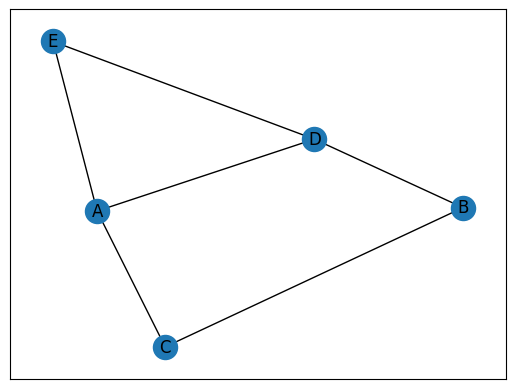

In [71]:
nx.draw_networkx(newG)

In [ ]:
# tarea pa mañana de la primera hoja del archivo de excel toamr primera y segunda coordenada , es de la matriz de conectividad y hacer un grafo 

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

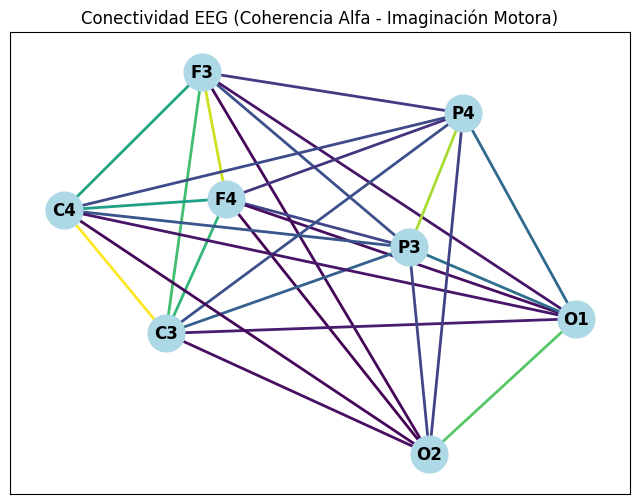

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar la matriz de coherencia desde el archivo Excel
df = pd.read_excel("C:/Users/Ana-Sophia Redstone/OneDrive/Documents/GitHub/Neurociencias-2026-1/S03_datasets/EEG.xlsx", sheet_name=0, index_col=0)

# Crear el grafo
G = nx.Graph()

# Añadir nodos
electrodos = df.columns.tolist()
G.add_nodes_from(electrodos)

# Añadir aristas con pesos de coherencia
for i in range(len(electrodos)):
    for j in range(i + 1, len(electrodos)):
        peso = df.iloc[i, j]
        if peso > 0:  # puedes ajustar el umbral si quieres filtrar conexiones débiles
            G.add_edge(electrodos[i], electrodos[j], weight=peso)

# Posición de los nodos (puedes usar otras como spring_layout)
pos = nx.spring_layout(G, seed=42)

# Extraer pesos para colorear las aristas
pesos = nx.get_edge_attributes(G, 'weight')
edges = G.edges()
colors = [pesos[edge] for edge in edges]

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color=colors, edge_cmap=plt.cm.viridis)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
plt.title("Conectividad EEG (Coherencia Alfa - Imaginación Motora)")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Coherencia')
plt.axis('off')
plt.tight_layout()
plt.show()